Here the data was uploaded onto Colab, then imported.

In [ ]:
import pandas as pd
df = pd.read_csv("NYC_taxi_fares (1).csv")

Here we will see the data we are working with.

In [ ]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
1048570,05:00.0,7.0,2014-09-13 17:05:00 UTC,-73.962580,40.778222,-73.973827,40.764247,4
1048571,48:25.0,8.9,2012-02-04 18:48:25 UTC,-73.990152,40.740837,-73.995193,40.760206,4
1048572,16:00.0,6.9,2012-06-22 19:16:00 UTC,-73.963888,40.767992,-73.974017,40.751570,1
1048573,12:00.0,12.0,2014-01-10 19:12:00 UTC,-73.972328,40.745277,-73.987682,40.739162,1


We check for null values within the dataset, then we check columns if they have any null values.

In [ ]:
print(df.isnull().values.any)

print(df['dropoff_longitude'].isnull().values.any())
print(df['dropoff_latitude'].isnull().values.any())

<built-in method any of numpy.ndarray object at 0x7813cae7e6d0>
True
True


We use dropna() to drop null values and setting it to a new df.

In [ ]:
df = df.dropna()

We reset the index after droping column.

In [ ]:
df = df.reset_index()

We define the formulas given to calculate the Eucliden Distance.

In [ ]:
def euc_distance(lat1, long1, lat2, long2):
  return (((lat1 - lat2) ** 2 + (long1 - long2) ** 2) ** 0.5)

Here we redefine the variables within euc_distance, then define distance as the euc_distance calculation.

In [ ]:
df["distance"] = euc_distance(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])

We print our df, and can see that distance calculation is now included in the last column.

In [ ]:
df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...,...
1048560,1048570,05:00.0,7.0,2014-09-13 17:05:00 UTC,-73.962580,40.778222,-73.973827,40.764247,4,0.017939
1048561,1048571,48:25.0,8.9,2012-02-04 18:48:25 UTC,-73.990152,40.740837,-73.995193,40.760206,4,0.020014
1048562,1048572,16:00.0,6.9,2012-06-22 19:16:00 UTC,-73.963888,40.767992,-73.974017,40.751570,1,0.019295
1048563,1048573,12:00.0,12.0,2014-01-10 19:12:00 UTC,-73.972328,40.745277,-73.987682,40.739162,1,0.016527


We import keras from tensorflow and layers. We then define the number of features and the model.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

num_features = 6

model = keras.Sequential([layers.Input(shape=(num_features,)), layers.Dense(128, activation='relu'), layers.Dense(64, activation='relu'), layers.Dense(1)])

Here we compile the model.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

We import train_test_split from sklearn.model_selection and then drop the columns that are not features.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['index', 'key', 'fare_amount', 'pickup_datetime'])
y = df['fare_amount']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Here we train the model and set it to history variable.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/30
26215/26215 [==============================] - 83s 3ms/step - loss: 84.0781 - mae: 5.2705 - val_loss: 33.0109 - val_mae: 2.7784
Epoch 2/30
26215/26215 [==============================] - 77s 3ms/step - loss: 33.7221 - mae: 2.7339 - val_loss: 30.6086 - val_mae: 2.6226
Epoch 3/30
26215/26215 [==============================] - 77s 3ms/step - loss: 38.3073 - mae: 2.7080 - val_loss: 32.6775 - val_mae: 2.6928
Epoch 4/30
26215/26215 [==============================] - 74s 3ms/step - loss: 32.1952 - mae: 2.6852 - val_loss: 30.9199 - val_mae: 2.6019
Epoch 5/30
26215/26215 [==============================] - 74s 3ms/step - loss: 32.3077 - mae: 2.6690 - val_loss: 27.5149 - val_mae: 2.4606
Epoch 6/30
26215/26215 [==============================] - 77s 3ms/step - loss: 31.6253 - mae: 2.6538 - val_loss: 28.1657 - val_mae: 2.4985
Epoch 7/30
26215/26215 [==============================] - 87s 3ms/step - loss: 30.2628 - mae: 2.6528 - val_loss: 27.6653 - val_mae: 2.6285
Epoch 8/30
26215/26215 [===

Here we bring in something to help us plot our training and validation loss. A plot will be created and shown.

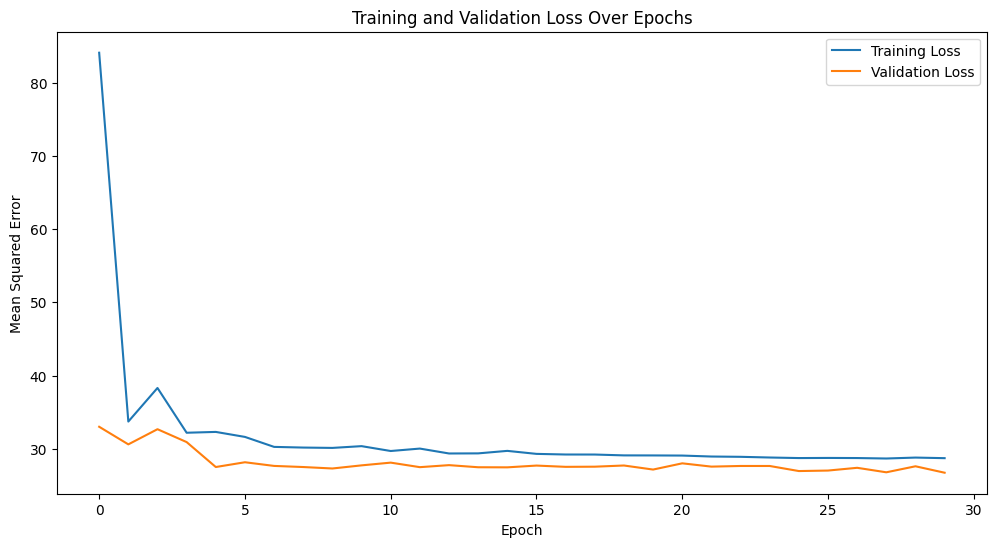

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()